In [ ]:
import pandas as pd

# Загрузка данных
Amazon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Финальный урок по пайтон/amazon_market_data.csv')  # путь к файлу на гугл диске

In [ ]:

Amazon.columns


Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
Amazon

,Order_date,Row_id,Order_id,Ship_mode,Customer_id,Segment,Country,City,State,Postal_code,Region,Product_id,Category,Sub-category,Product_name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
Количество уникальных клиентов: 693
Общее количество транзакций: 3312
Среднее количество транзакций на клиента: 4.78

Общая сумма продаж по сегментам:
Segment
Consumer       331904.6999
Corporate      241847.8244
Home Office    159462.7309
Name: Sales, dtype: float64

Общая прибыль по сегментам:
Segment
Consumer       45568.2391
Corporate      26782.3633
Home Office    21088.6672
Name: Profit, dtype: float64


<ipython-input-2-beced2aa0c48>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Amazon['Order_date'] = pd.to_datetime(Amazon['Order_date'])


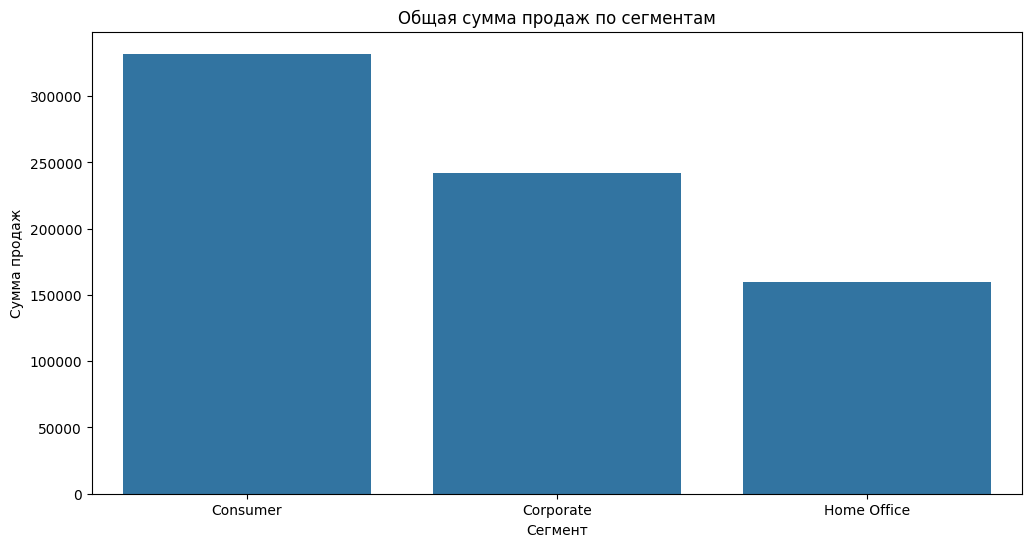

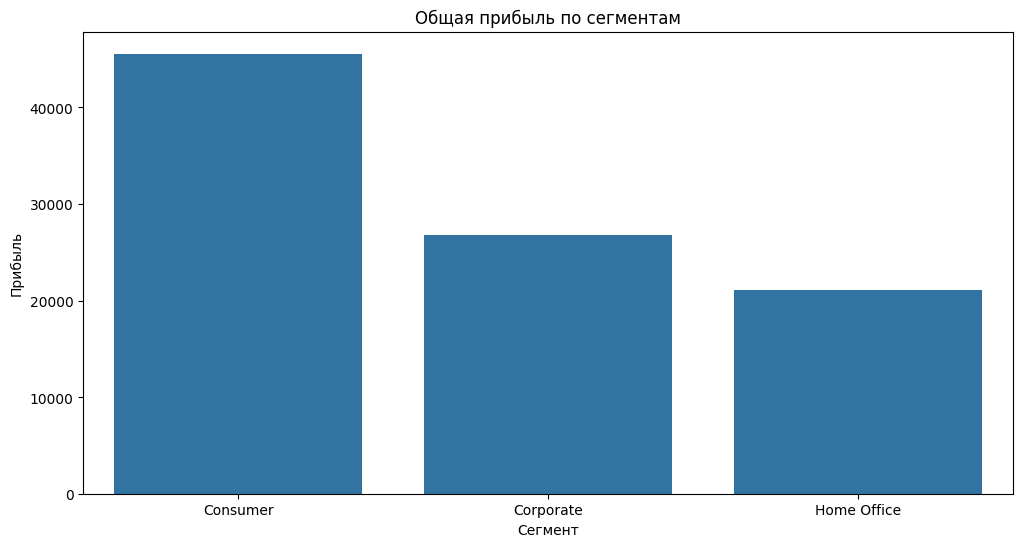


Общая прибыль по категориям товаров:
Category
Furniture           3018.3913
Office Supplies    39736.6217
Technology         50684.2566
Name: Profit, dtype: float64


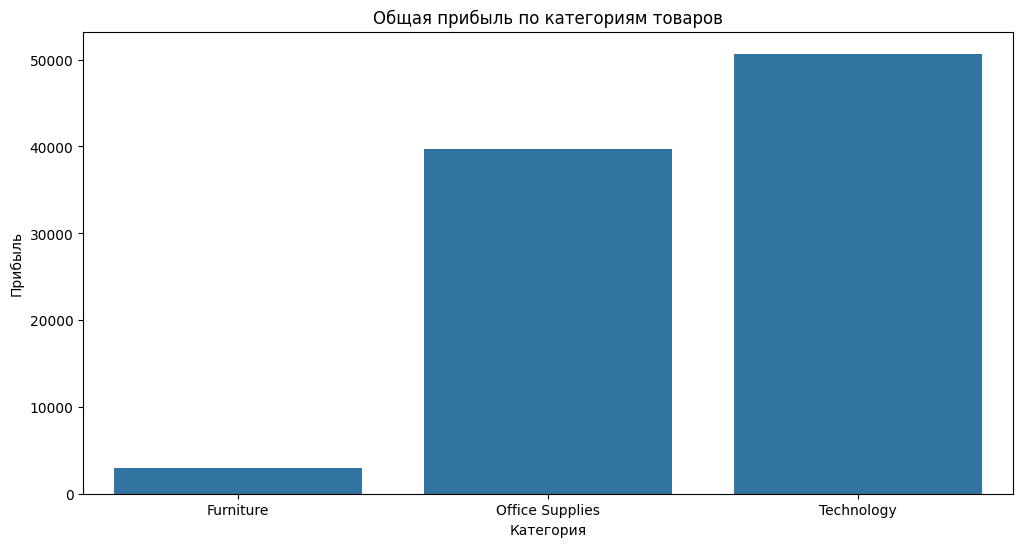

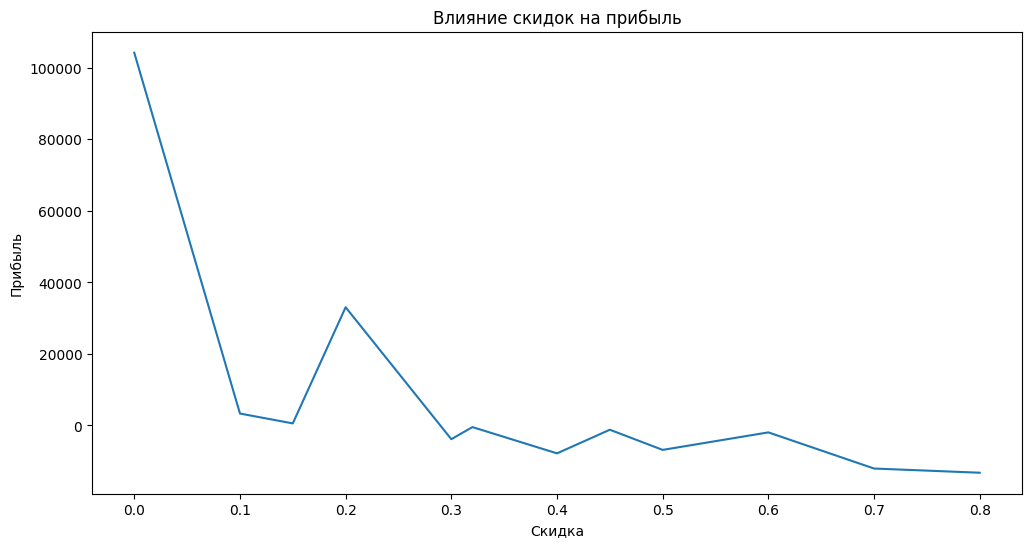

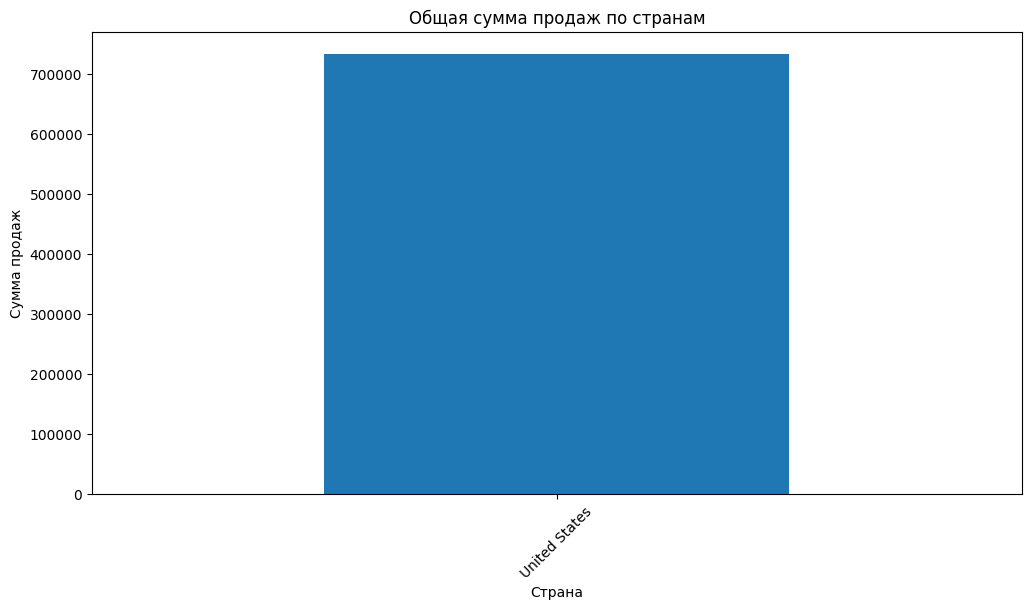

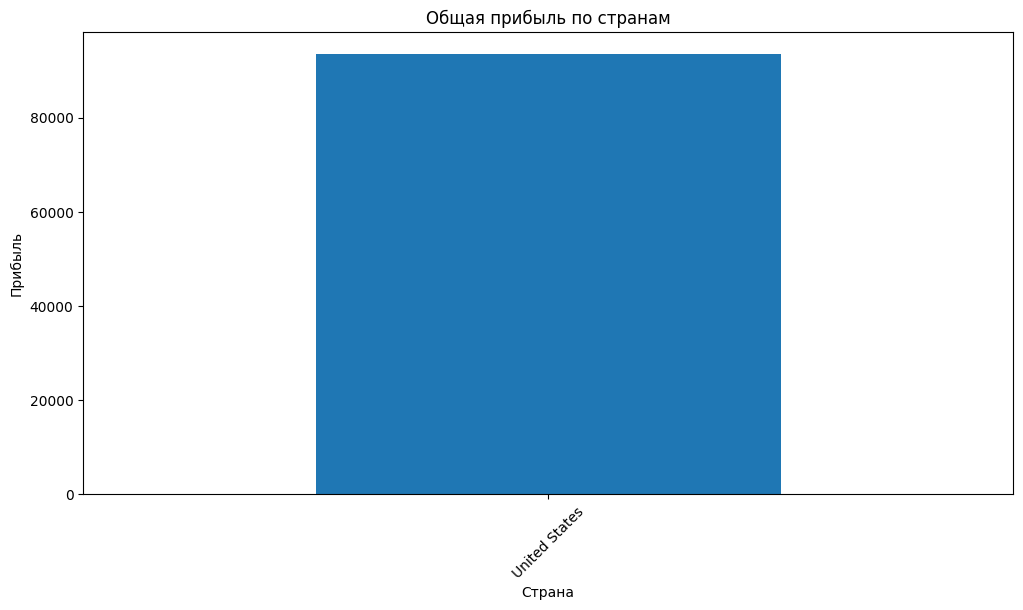

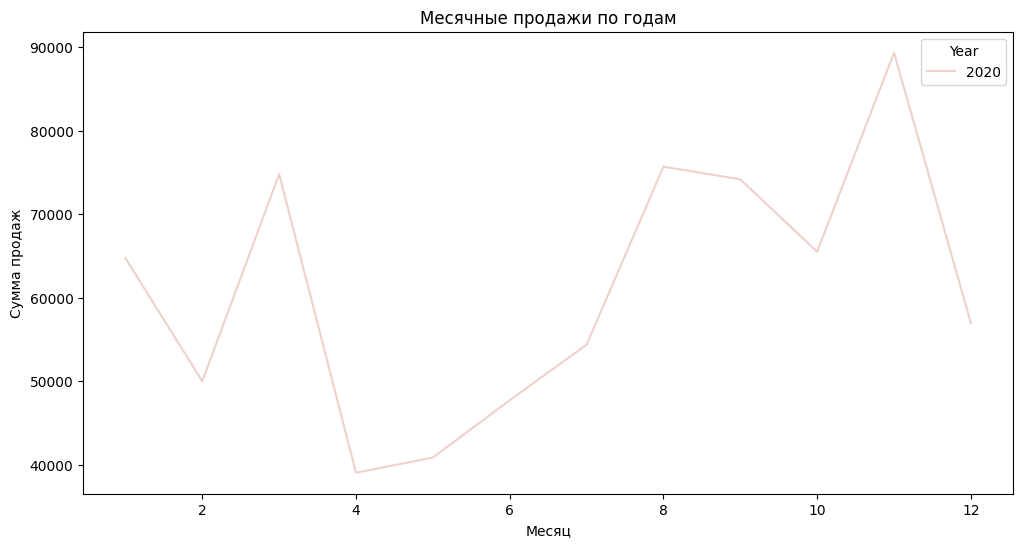

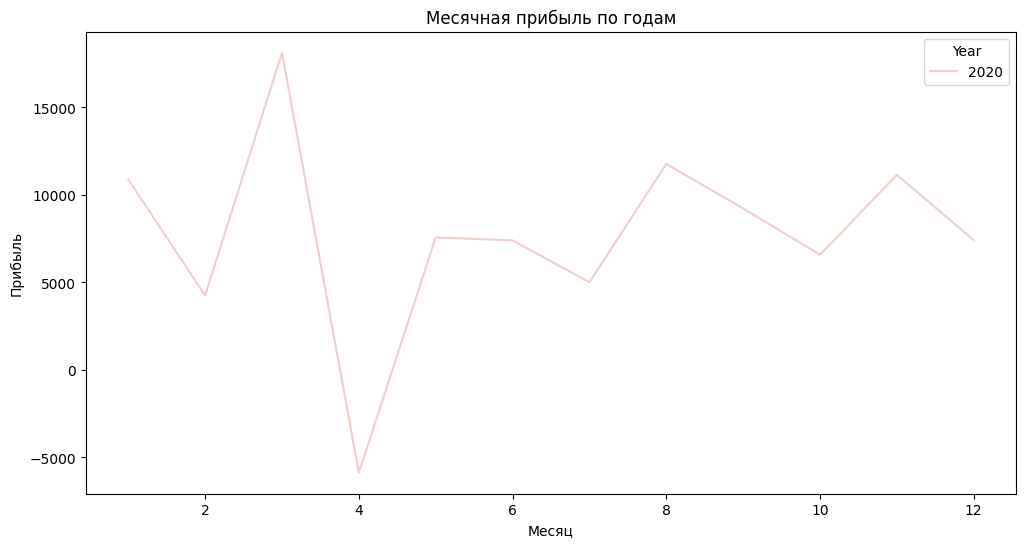

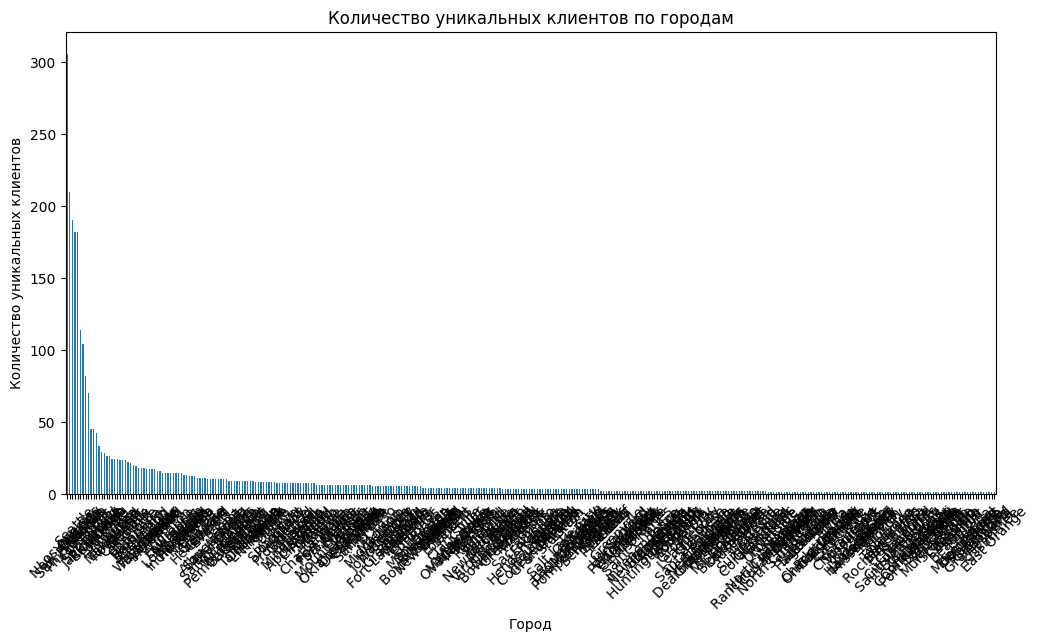

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
Amazon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Финальный урок по пайтон/amazon_market_data.csv')

Amazon.columns = Amazon.columns.str.strip()  # Удаляет пробелы в начале и в конце

# 1. Вывести список полей таблицы
print(Amazon.columns.tolist())

# 2. Привести столбцы к camel case
Amazon.columns = [col.lower().replace(' ', '_') for col in Amazon.columns]
Amazon.columns = [col[0].upper() + col[1:] for col in Amazon.columns]

# 3. Привести типы данных — даты должны быть в формате datetime
Amazon['Order_date'] = pd.to_datetime(Amazon['Order_date'])

# 4. Найти и удалить дубли и пропуски
Amazon.drop_duplicates(inplace=True)
Amazon.dropna(inplace=True)

# 5. Переход к исследовательскому анализу данных

# Определяем количество клиентов
total_customers = Amazon['Customer_id'].nunique()
print(f'Количество уникальных клиентов: {total_customers}')

# Узнаем общее количество транзакций
total_transactions = len(Amazon)
print(f'Общее количество транзакций: {total_transactions}')

# Среднее количество транзакций на клиента
avg_transactions_per_customer = total_transactions / total_customers
print(f'Среднее количество транзакций на клиента: {avg_transactions_per_customer:.2f}')

# 6. Анализ продаж и прибыли по сегментам
segment_sales = Amazon.groupby('Segment')['Sales'].sum()
segment_profit = Amazon.groupby('Segment')['Profit'].sum()

print("\nОбщая сумма продаж по сегментам:")
print(segment_sales)

print("\nОбщая прибыль по сегментам:")
print(segment_profit)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title('Общая сумма продаж по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Сумма продаж')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=segment_profit.index, y=segment_profit.values)
plt.title('Общая прибыль по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Прибыль')
plt.show()

# 7. Анализ прибыли по категориям товаров
category_profit = Amazon.groupby('Category')['Profit'].sum()
print("\nОбщая прибыль по категориям товаров:")
print(category_profit)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Общая прибыль по категориям товаров')
plt.xlabel('Категория')
plt.ylabel('Прибыль')
plt.show()

# 8. Анализ влияния скидок на прибыль
discount_profit = Amazon.groupby('Discount')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Discount', y='Profit', data=discount_profit)
plt.title('Влияние скидок на прибыль')
plt.xlabel('Скидка')
plt.ylabel('Прибыль')
plt.show()

# 9. Географический анализ
country_sales = Amazon.groupby('Country')['Sales'].sum()
country_profit = Amazon.groupby('Country')['Profit'].sum()

plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Общая сумма продаж по странам')
plt.xlabel('Страна')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
country_profit.plot(kind='bar')
plt.title('Общая прибыль по странам')
plt.xlabel('Страна')
plt.ylabel('Прибыль')
plt.xticks(rotation=45)
plt.show()

# 10. Временной анализ
Amazon['Order_date'] = pd.to_datetime(Amazon['Order_date'])
Amazon['Year'] = Amazon['Order_date'].dt.year
Amazon['Month'] = Amazon['Order_date'].dt.month

monthly_sales = Amazon.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_profit = Amazon.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales)
plt.title('Месячные продажи по годам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Profit', hue='Year', data=monthly_profit)
plt.title('Месячная прибыль по годам')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')
plt.show()

# 11. Анализ места жительства клиентов
city_counts = Amazon['City'].value_counts()
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')
plt.title('Количество уникальных клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество уникальных клиентов')
plt.xticks(rotation=45)
plt.show()

На основе предоставленных данных можно сделать несколько ключевых выводов и наблюдений о продажах, клиентах и прибыли.

### Общее количество клиентов и транзакций
- **Количество уникальных клиентов**: 693
- **Общее количество транзакций**: 3312
- **Среднее количество транзакций на клиента**: 4.78

Эти данные указывают на то, что на каждого клиента в среднем приходится почти 5 транзакций, что свидетельствует о высокой лояльности клиентов и их заинтересованности в продукции.

### Продажи по сегментам
- **Общая сумма продаж**:
  - Consumer: 331,904.70
  - Corporate: 241,847.82
  - Home Office: 159,462.73

Наибольшую долю продаж составляет сегмент **Consumer**, что может свидетельствовать о том, что физические лица покупают больше товаров, чем корпоративные клиенты. Это может давать представление о целевой аудитории и предпочтениях.

### Прибыль по сегментам
- **Общая прибыль**:
  - Consumer: 45,568.24
  - Corporate: 26,782.36
  - Home Office: 21,088.67

Несмотря на то, что сегмент **Corporate** приносит меньше продаж, он более прибыльный по сравнению с сегментом **Home Office**. Это может быть связано с более высокими ценами на товары, которые покупают корпоративные клиенты, или с меньшими скидками.

### Прибыль по категориям товаров
- **Общая прибыль**:
  - Furniture: 3,018.39
  - Office Supplies: 39,736.62
  - Technology: 50,684.26

Категория **Technology** приносит наибольшую прибыль, что может указывать на высокий спрос на технологические товары. В то же время, категория **Furniture** имеет значительно меньшую прибыль, возможно, из-за более низкой маржи или меньшего объема продаж.

### Заключение
1. **Сегменты**: Сегмент **Consumer** является основным источником продаж, но корпоративные клиенты приносят более высокую прибыль.
2. **Категории товаров**: Технологические товары представляют собой наиболее прибыльную категорию, и стоит рассмотреть возможность увеличения предложений в этой области.
3. **Лояльность клиентов**: Среднее количество транзакций на клиента указывает на то, что клиенты возвращаются за повторными покупками, что является положительным знаком для бизнеса.

### Рекомендации для Amazon:
- Рассмотреть возможность увеличения маркетинговых усилий для привлечения корпоративных клиентов, так как они приносят большую прибыль.
- Увеличить ассортимент товаров в категории **Technology** для удовлетворения спроса.
- Анализировать причины низкой прибыли в категории **Furniture** и, возможно, корректировать ценовую стратегию или предлагать дополнительные скидки для повышения объема продаж.